In [2]:
#### Data Analysis & Calculation. 

import pandas as pd 
import numpy as np 

#### Machine Learning.
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Data Visualization. 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
new = pd.read_csv(r"C:\Users\LENOVO\Desktop\Data Science\Imarticus\Machine Learning\Linear regression\Project 1.1\2019.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall_rank                  156 non-null    int64  
 1   Country_or_region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP_per_capita                156 non-null    float64
 4   Social_support                156 non-null    float64
 5   Healthy_life_expectancy       156 non-null    float64
 6   Freedom_to_make_life_choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
# Let's look at some statistical information about our dataframe.
new.describe()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Overall_rank                       AxesSubplot(0.125,0.653529;0.227941x0.226471)
Score                           AxesSubplot(0.398529,0.653529;0.227941x0.226471)
GDP_per_capita                  AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Social_support                     AxesSubplot(0.125,0.381765;0.227941x0.226471)
Healthy_life_expectancy         AxesSubplot(0.398529,0.381765;0.227941x0.226471)
Freedom_to_make_life_choices    AxesSubplot(0.672059,0.381765;0.227941x0.226471)
Generosity                             AxesSubplot(0.125,0.11;0.227941x0.226471)
Perceptions_of_corruption           AxesSubplot(0.398529,0.11;0.227941x0.226471)
dtype: object

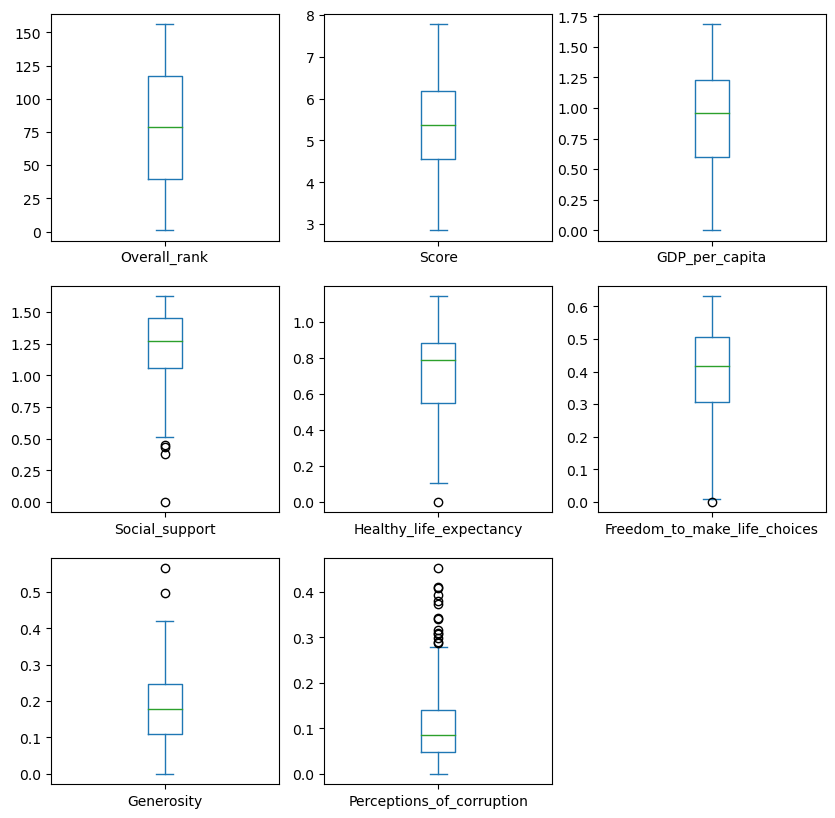

In [8]:
# Checking for Outlier
new.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

<AxesSubplot:>

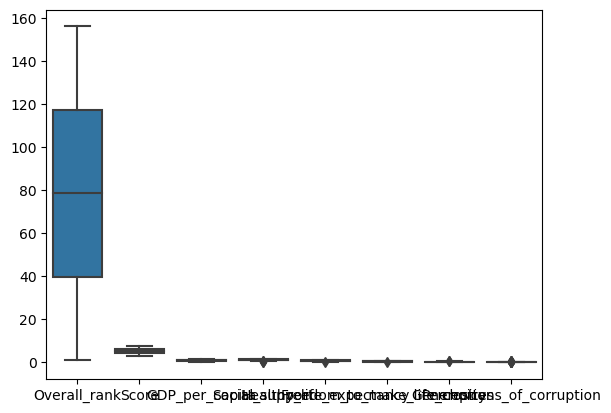

In [9]:
sns.boxplot(data=new)

In [10]:
q1 = new['Overall_rank'].quantile(0.25)
q3 = new['Overall_rank'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

233.5

In [11]:
new['Overall_rank']=np.where(new['Overall_rank'] > upper_limit,upper_limit,new['Overall_rank']) # upper lim

<AxesSubplot:>

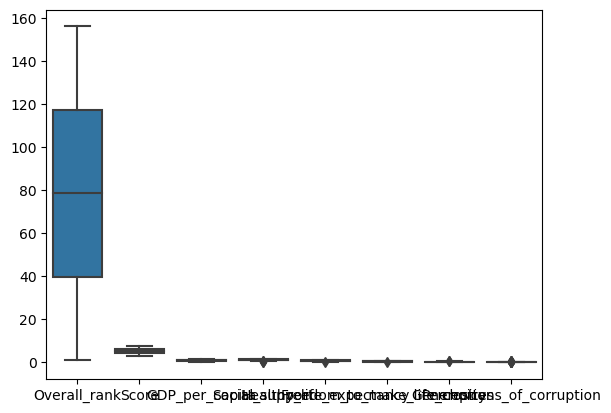

In [12]:
sns.boxplot(data=new)

In [13]:
q1 = new['Score'].quantile(0.25)
q3 = new['Score'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

8.644499999999999

In [14]:
new['Score']=np.where(new['Score'] > upper_limit,upper_limit,new['Score']) # upper lim

<AxesSubplot:>

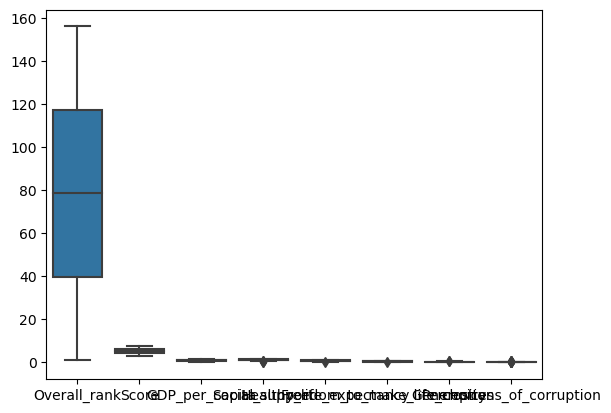

In [15]:
sns.boxplot(data=new)

In [16]:
q1 = new['GDP_per_capita'].quantile(0.25)
q3 = new['GDP_per_capita'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.177125

In [17]:
new['GDP_per_capita']=np.where(new['GDP_per_capita'] > upper_limit,upper_limit,new['GDP_per_capita']) # upper lim

<AxesSubplot:>

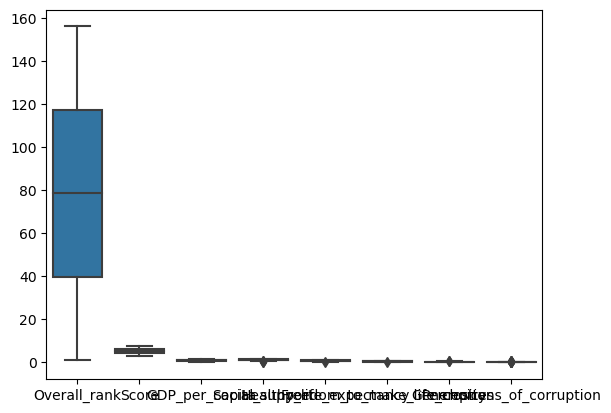

In [18]:
sns.boxplot(data=new)

In [19]:
q1 = new['Social_support'].quantile(0.25)
q3 = new['Social_support'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.047625

In [20]:
new['Social_support']=np.where(new['Social_support'] > upper_limit,upper_limit,new['Social_support']) # upper limit


<AxesSubplot:>

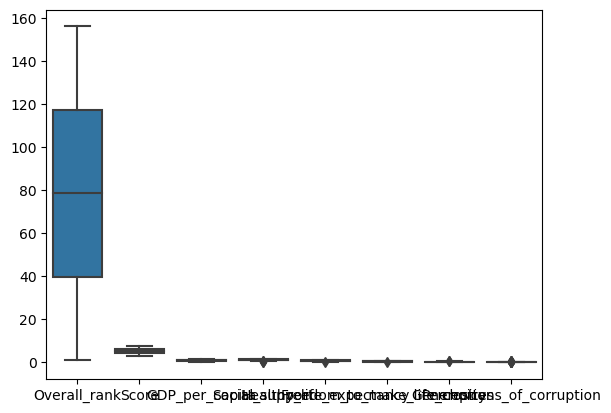

In [21]:
sns.boxplot(data=new)

In [22]:
q1 = new['Healthy_life_expectancy'].quantile(0.25)
q3 = new['Healthy_life_expectancy'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.38275

In [23]:
new['Healthy_life_expectancy']=np.where(new['Healthy_life_expectancy'] > upper_limit,upper_limit,new['Healthy_life_expectancy']) # upper lim

<AxesSubplot:>

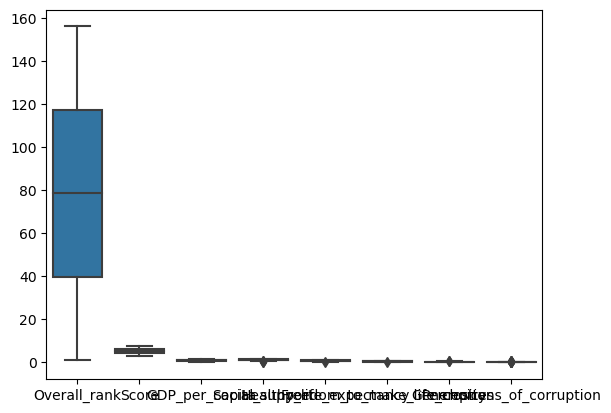

In [24]:
sns.boxplot(data=new)

In [25]:
q1 = new['Freedom_to_make_life_choices'].quantile(0.25)
q3 = new['Freedom_to_make_life_choices'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.806125

In [26]:
new['Freedom_to_make_life_choices']=np.where(new['Freedom_to_make_life_choices'] > upper_limit,upper_limit,new['Freedom_to_make_life_choices']) # upper lim

<AxesSubplot:>

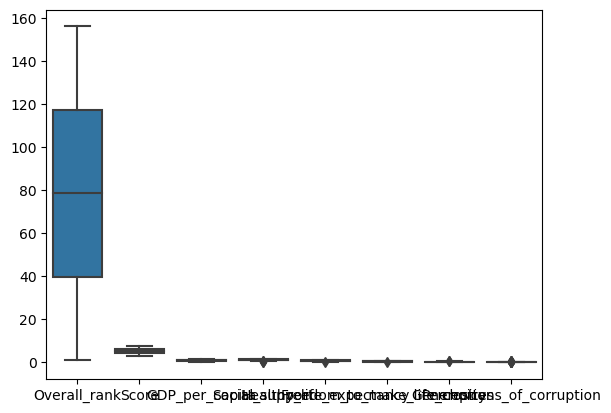

In [27]:
sns.boxplot(data=new)

In [28]:
q1 = new['Generosity'].quantile(0.25)
q3 = new['Generosity'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.4575

In [29]:
new['Generositys']=np.where(new['Generosity'] > upper_limit,upper_limit,new['Generosity']) # upper lim

<AxesSubplot:>

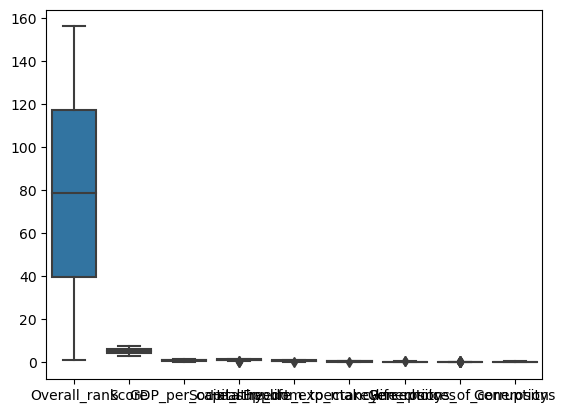

In [30]:
sns.boxplot(data=new)

In [31]:
q1 = new['Perceptions_of_corruption'].quantile(0.25)
q3 = new['Perceptions_of_corruption'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.28262499999999996

In [32]:
new['Perceptions_of_corruption']=np.where(new['Perceptions_of_corruption'] > upper_limit,upper_limit,new['Perceptions_of_corruption']) # upper lim

<AxesSubplot:>

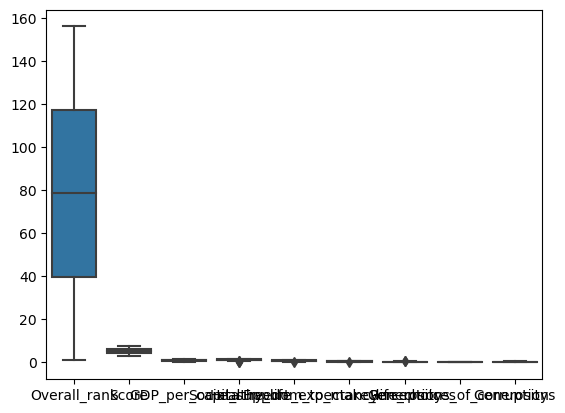

In [33]:
sns.boxplot(data=new)

In [34]:
q1 = new['Overall_rank'].quantile(0.25)
q3 = new['Overall_rank'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q1-1.5*iqr #acceptable range
lower_limit

-76.5

In [35]:
new['Overall_rank']=np.where(new['Overall_rank'] < upper_limit,upper_limit,new['Overall_rank']) # lower lim

In [36]:
q1 = new['Score'].quantile(0.25)
q3 = new['Score'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q1-1.5*iqr #acceptable range
lower_limit

2.0845000000000007

In [37]:
new['Score']=np.where(new['Score'] < upper_limit,upper_limit,new['Score']) # lower lim

In [38]:
q1 = new['GDP_per_capita'].quantile(0.25)
q3 = new['GDP_per_capita'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q1-1.5*iqr #acceptable range
lower_limit

-0.34187500000000026

In [39]:
new['GDP_per_capita']=np.where(new['GDP_per_capita'] < upper_limit,upper_limit,new['GDP_per_capita']) # lower lim

In [40]:
q1 = new['Social_support'].quantile(0.25)
q3 = new['Social_support'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q1-1.5*iqr #acceptable range
lower_limit

0.46062500000000006

In [41]:
new['Social_support']=np.where(new['Social_support'] < upper_limit,upper_limit,new['Social_support']) # lower lim

In [42]:
q1 = new['Healthy_life_expectancy'].quantile(0.25)
q3 = new['Healthy_life_expectancy'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q1-1.5*iqr #acceptable range
lower_limit

0.04675000000000018

In [43]:
new['Healthy_life_expectancy']=np.where(new['Healthy_life_expectancy'] < upper_limit,upper_limit,new['Healthy_life_expectancy']) # lower lim

In [44]:
q1 = new['Freedom_to_make_life_choices'].quantile(0.25)
q3 = new['Freedom_to_make_life_choices'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q1-1.5*iqr #acceptable range
lower_limit

0.009124999999999994

In [45]:
new['Freedom_to_make_life_choices']=np.where(new['Freedom_to_make_life_choices'] < upper_limit,upper_limit,new['Freedom_to_make_life_choices']) # lower lim

In [46]:
q1 = new['Generosity'].quantile(0.25)
q3 = new['Generosity'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q1-1.5*iqr #acceptable range
lower_limit

-0.10050000000000002

In [47]:
new['Generosity']=np.where(new['Generosity'] < upper_limit,upper_limit,new['Generosity']) # lower lim

In [48]:
q1 = new['Perceptions_of_corruption'].quantile(0.25)
q3 = new['Perceptions_of_corruption'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q1-1.5*iqr #acceptable range
lower_limit

-0.09437499999999997

In [49]:
new['Perception_of_corruption']=np.where(new['Perceptions_of_corruption'] < upper_limit,upper_limit,new['Perceptions_of_corruption']) # lower lim

<AxesSubplot:>

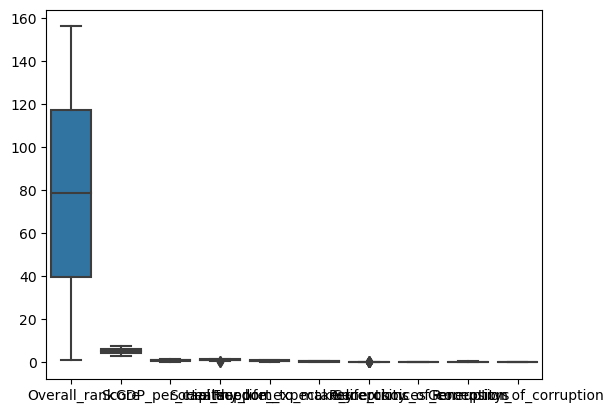

In [50]:
sns.boxplot(data=new)

In [51]:
new.isna().sum() 

Overall_rank                    0
Country_or_region               0
Score                           0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
Generositys                     0
Perception_of_corruption        0
dtype: int64

In [52]:
new.head()

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Generositys,Perception_of_corruption
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.282625,0.282625,0.153,0.282625
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.282625,0.282625,0.252,0.282625
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.282625,0.282625,0.271,0.282625
3,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354000,0.118000,0.354,0.282625
4,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322000,0.282625,0.322,0.282625


In [53]:
new = new.drop(['Country_or_region'],axis= 1)
new

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Generositys,Perception_of_corruption
0,1.0,7.769,1.340000,1.587000,0.986000,0.596000,0.282625,0.282625,0.153,0.282625
1,2.0,7.600,1.383000,1.573000,0.996000,0.592000,0.282625,0.282625,0.252,0.282625
2,3.0,7.554,1.488000,1.582000,1.028000,0.603000,0.282625,0.282625,0.271,0.282625
3,4.0,7.494,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000,0.354,0.282625
4,5.0,7.488,1.396000,1.522000,0.999000,0.557000,0.322000,0.282625,0.322,0.282625
...,...,...,...,...,...,...,...,...,...,...
151,152.0,3.334,0.359000,0.711000,0.614000,0.555000,0.282625,0.282625,0.217,0.282625
152,153.0,3.231,0.476000,0.885000,0.499000,0.417000,0.282625,0.147000,0.276,0.282625
153,154.0,3.203,0.350000,0.517000,0.361000,0.282625,0.282625,0.025000,0.158,0.282625
154,155.0,3.083,0.282625,0.282625,0.282625,0.282625,0.282625,0.035000,0.235,0.282625


In [54]:
# Putting feature variable to X
X = new.drop('Overall_rank', axis= 1)

# Putting response variable to y
y = new[['Overall_rank']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [55]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Generositys,Perception_of_corruption
59,60.0,5.809,1.173000,1.508,0.729,0.410,0.282625,0.096,0.146,0.282625
3,4.0,7.494,1.380000,1.624,1.026,0.591,0.354000,0.118,0.354,0.282625
113,114.0,4.628,0.282625,0.774,0.366,0.318,0.282625,0.102,0.188,0.282625
85,86.0,5.261,0.551000,1.438,0.723,0.508,0.300000,0.023,0.300,0.282625
152,153.0,3.231,0.476000,0.885,0.499,0.417,0.282625,0.147,0.276,0.282625


In [56]:
np.round(df.corr(),2)

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Generositys,Perception_of_corruption
Overall_rank,1.00,-0.99,-0.80,-0.75,-0.80,-0.56,0.06,-0.35,-0.03,NaN
Score,-0.99,1.00,0.78,0.76,0.79,0.57,-0.03,0.37,0.06,NaN
GDP_per_capita,-0.80,0.78,1.00,0.75,0.86,0.42,-0.01,0.34,-0.06,NaN
Social_support,-0.75,0.76,0.75,1.00,0.75,0.47,-0.00,0.16,-0.04,NaN
Healthy_life_expectancy,-0.80,0.79,0.86,0.75,1.00,0.43,-0.03,0.31,-0.03,NaN
Freedom_to_make_life_choices,-0.56,0.57,0.42,0.47,0.43,1.00,0.16,0.49,0.28,NaN
Generosity,0.06,-0.03,-0.01,-0.00,-0.03,0.16,1.00,0.11,0.64,NaN
Perceptions_of_corruption,-0.35,0.37,0.34,0.16,0.31,0.49,0.11,1.00,0.33,NaN
Generositys,-0.03,0.06,-0.06,-0.04,-0.03,0.28,0.64,0.33,1.00,NaN
Perception_of_corruption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Overall_rank vs Score'}, xlabel='Score', ylabel='Overall_rank'>

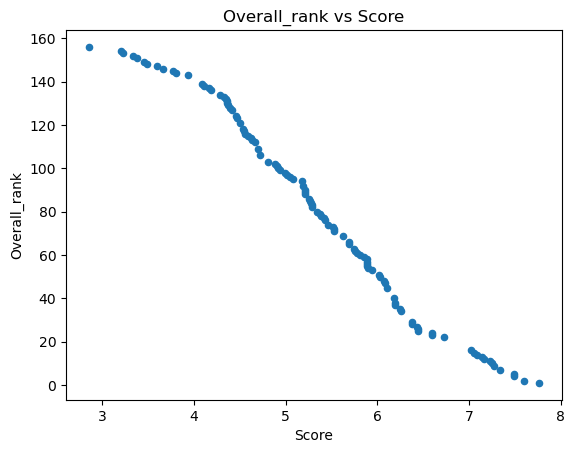

In [57]:
df.plot.scatter(x='Score', y='Overall_rank', title='Overall_rank vs Score')

<AxesSubplot:title={'center':'Overall_rank vs GDP_per_capita'}, xlabel='GDP_per_capita', ylabel='Overall_rank'>

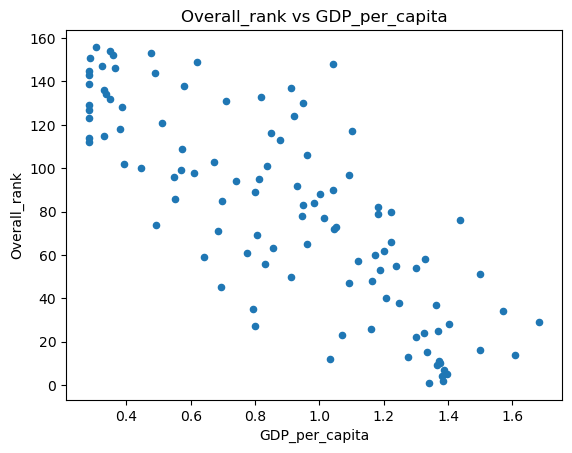

In [58]:
df.plot.scatter(x='GDP_per_capita', y='Overall_rank', title='Overall_rank vs GDP_per_capita')

<AxesSubplot:title={'center':'Overall_rank vs Social_support'}, xlabel='Social_support', ylabel='Overall_rank'>

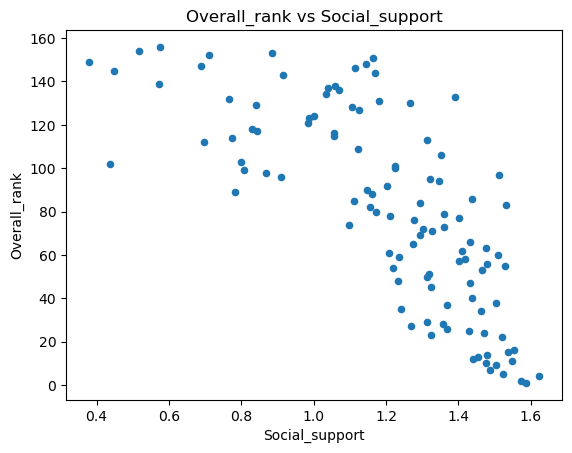

In [59]:
df.plot.scatter(x='Social_support', y='Overall_rank', title='Overall_rank vs Social_support')

In [60]:
df.corr()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Generositys,Perception_of_corruption
Overall_rank,1.000000,-0.988817,-0.800381,-0.753105,-0.796993,-0.556520,0.057495,-0.352099,-0.028984,NaN
Score,-0.988817,1.000000,0.783761,0.760372,0.785728,0.566318,-0.031955,0.371255,0.059895,NaN
GDP_per_capita,-0.800381,0.783761,1.000000,0.747250,0.862091,0.416915,-0.012395,0.335728,-0.063353,NaN
Social_support,-0.753105,0.760372,0.747250,1.000000,0.750586,0.472956,-0.000542,0.159113,-0.038535,NaN
Healthy_life_expectancy,-0.796993,0.785728,0.862091,0.750586,1.000000,0.433484,-0.029332,0.308475,-0.034912,NaN
Freedom_to_make_life_choices,-0.556520,0.566318,0.416915,0.472956,0.433484,1.000000,0.161864,0.488709,0.275348,NaN
Generosity,0.057495,-0.031955,-0.012395,-0.000542,-0.029332,0.161864,1.000000,0.112441,0.637905,NaN
Perceptions_of_corruption,-0.352099,0.371255,0.335728,0.159113,0.308475,0.488709,0.112441,1.000000,0.330122,NaN
Generositys,-0.028984,0.059895,-0.063353,-0.038535,-0.034912,0.275348,0.637905,0.330122,1.000000,NaN
Perception_of_corruption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

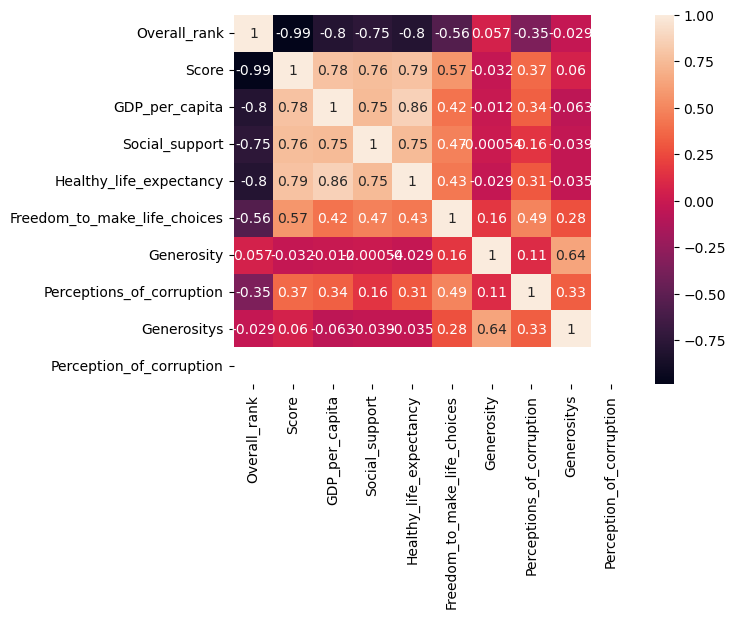

In [61]:
sns.heatmap(df.corr(),annot = True)

## Score have 99% strong negative correlation with Overall rank
* Score have high impact on Sales
* There is multi collinearity exists

In [62]:
X1 = df.drop(['Overall_rank'],axis=1)
X1.columns

Index(['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Generositys', 'Perception_of_corruption'],
      dtype='object')

In [63]:
X1=df.drop(['Overall_rank'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

Score                             4.049511
GDP_per_capita                    4.914302
Social_support                    3.236025
Healthy_life_expectancy           4.627034
Freedom_to_make_life_choices      1.871477
Generosity                        1.811286
Perceptions_of_corruption         1.640439
Generositys                       2.098189
Perception_of_corruption        113.210664
dtype: float64

In [64]:
new = new.drop('Perceptions_of_corruption', axis=1)

In [65]:
new.head()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Generositys,Perception_of_corruption
0,1.0,7.769,1.340,1.587,0.986,0.596,0.282625,0.153,0.282625
1,2.0,7.600,1.383,1.573,0.996,0.592,0.282625,0.252,0.282625
2,3.0,7.554,1.488,1.582,1.028,0.603,0.282625,0.271,0.282625
3,4.0,7.494,1.380,1.624,1.026,0.591,0.354000,0.354,0.282625
4,5.0,7.488,1.396,1.522,0.999,0.557,0.322000,0.322,0.282625


In [66]:
X1 = df.drop(['Overall_rank','Perception_of_corruption'],axis=1)
X1.columns

Index(['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Generositys'],
      dtype='object')

In [67]:
X1=df.drop(['Overall_rank','Perception_of_corruption'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

Score                           80.666906
GDP_per_capita                  27.502908
Social_support                  59.358655
Healthy_life_expectancy         46.530349
Freedom_to_make_life_choices    33.047299
Generosity                      32.561779
Perceptions_of_corruption        4.665873
Generositys                      8.335728
dtype: float64

In [68]:
X1=df.drop(['Overall_rank','Perception_of_corruption','Social_support'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

Score                           68.308108
GDP_per_capita                  26.439687
Healthy_life_expectancy         44.645476
Freedom_to_make_life_choices    31.433577
Generosity                      30.792197
Perceptions_of_corruption        4.281590
Generositys                      8.253138
dtype: float64

In [69]:
X1=df.drop(['Overall_rank','Perception_of_corruption','Social_support','Score'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

GDP_per_capita                  24.805301
Healthy_life_expectancy         38.385538
Freedom_to_make_life_choices    25.391101
Generosity                      25.336141
Perceptions_of_corruption        4.281288
Generositys                      8.206633
dtype: float64

In [70]:
X1=df.drop(['Overall_rank','Perception_of_corruption','Social_support','Score','Healthy_life_expectancy'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

GDP_per_capita                   8.285542
Freedom_to_make_life_choices    23.941937
Generosity                      23.911934
Perceptions_of_corruption        4.276165
Generositys                      8.173829
dtype: float64

In [71]:
X1=df.drop(['Overall_rank','Perception_of_corruption','Social_support','Score','Healthy_life_expectancy','Freedom_to_make_life_choices'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

GDP_per_capita                7.097180
Generosity                   14.071784
Perceptions_of_corruption     3.771168
Generositys                   8.172317
dtype: float64

In [72]:
X1=df.drop(['Overall_rank','Perception_of_corruption','Social_support','Score','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

GDP_per_capita               3.704572
Perceptions_of_corruption    3.723760
Generositys                  3.528796
dtype: float64

In [73]:
X1.columns

Index(['GDP_per_capita', 'Perceptions_of_corruption', 'Generositys'], dtype='object')

### No collinearity in the data, indicate no multi colinearity

## Model Building
H0 :- There is no Linear relationship between variables

                  Vs 
H1 :- There is Linear relationship between variables


Alpha = 0.05 (5%)

In [74]:
import statsmodels.formula.api as smf

In [75]:
model = smf.ols('Overall_rank ~ Score+GDP_per_capita+Social_support+Healthy_life_expectancy+Freedom_to_make_life_choices+Generosity+Generositys+Perception_of_corruption' , data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall_rank   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     728.8
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.00e-83
Time:                        13:48:34   Log-Likelihood:                -354.71
No. Observations:                 109   AIC:                             725.4
Df Residuals:                     101   BIC:                             747.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      261.1037      6.137     42.544      0.000     248.929     273.278
Score                          -37.9300      1.121    -33.847      0.000     -40.153     -35.707
GDP_per_capita                  -6.9340      3.470     -1.998      0.048     -13.818      -0.050
Social_support                   4.6692      3.743      1.247      0.215      -2.757      12.095
Healthy_life_expectancy         -4.2627      5.641     -0.756      0.452     -15.454       6.928
Freedom_to_make_life_choices    -4.2662      7.841     -0.544      0.588     -19.820      11.288
Generosity                      20.2167     20.923      0.966      0.336     -21.290      61.723
Generositys                      7.2458      9.158      0.791      0.431     -10.921      25.412
Perception_of_corruption        73.7944      1.735     42.544      0.000      70.354      77.235
==============================================================================
Omnibus:                        6.037   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.839
Skew:                          -0.411   Prob(JB):                       0.0539
Kurtosis:                       3.781   Cond. No.                     1.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
model = smf.ols('Overall_rank ~ Score + GDP_per_capita + Perception_of_corruption' , data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall_rank   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2523.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           4.00e-90
Time:                        13:48:34   Log-Likelihood:                -357.87
No. Observations:                 109   AIC:                             721.7
Df Residuals:                     106   BIC:                             729.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  268.2627      3.161     84.855      0.000     261.995     274.530
Score                      -37.7546      0.904    -41.784      0.000     -39.546     -35.963
GDP_per_capita              -7.6041      2.592     -2.934      0.004     -12.742      -2.466
Perception_of_corruption    75.8177      0.893     84.855      0.000      74.046      77.589
==============================================================================
Omnibus:                        6.351   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.055
Skew:                          -0.446   Prob(JB):                       0.0484
Kurtosis:                       3.734   Cond. No.                     1.31e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [77]:
df.head()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Generositys,Perception_of_corruption
59,60.0,5.809,1.173000,1.508,0.729,0.410,0.282625,0.096,0.146,0.282625
3,4.0,7.494,1.380000,1.624,1.026,0.591,0.354000,0.118,0.354,0.282625
113,114.0,4.628,0.282625,0.774,0.366,0.318,0.282625,0.102,0.188,0.282625
85,86.0,5.261,0.551000,1.438,0.723,0.508,0.300000,0.023,0.300,0.282625
152,153.0,3.231,0.476000,0.885,0.499,0.417,0.282625,0.147,0.276,0.282625


In [78]:
# Y = intercet + b1 * Score + b2 * GDP_per_capita + b3 * Perception_of_corruption
Y = 268.2627 - 37.7546 * 5.809  - 7.6041 * 1.173000 + 75.8177 * 0.096
Y

47.305118499999956

In [79]:
df['fitted_value']=model.fittedvalues #Predicted Value
df['residual']=model.resid  #Error
df.head()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Generositys,Perception_of_corruption,fitted_value,residual
59,60.0,5.809,1.173000,1.508,0.729,0.410,0.282625,0.096,0.146,0.282625,61.454639,-1.454639
3,4.0,7.494,1.380000,1.624,1.026,0.591,0.354000,0.118,0.354,0.282625,-3.735894,7.735894
113,114.0,4.628,0.282625,0.774,0.366,0.318,0.282625,0.102,0.188,0.282625,112.813293,1.186707
85,86.0,5.261,0.551000,1.438,0.723,0.508,0.300000,0.023,0.300,0.282625,86.873891,-0.873891
152,153.0,3.231,0.476000,0.885,0.499,0.417,0.282625,0.147,0.276,0.282625,164.086020,-11.086020


## Linearity

<AxesSubplot:title={'center':'Overall_rank vs Score'}, xlabel='Score', ylabel='Overall_rank'>

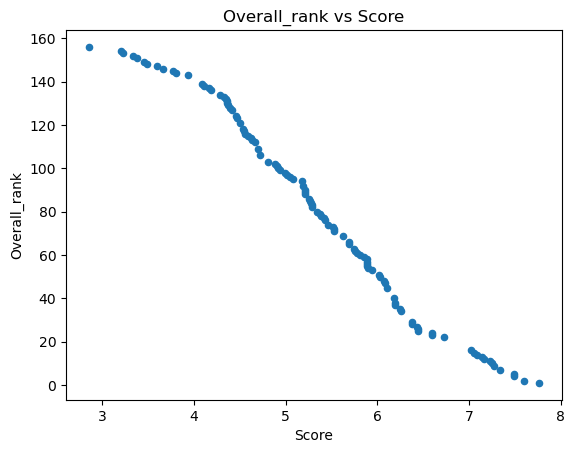

In [80]:
df.plot.scatter(x='Score', y='Overall_rank', title='Overall_rank vs Score')

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

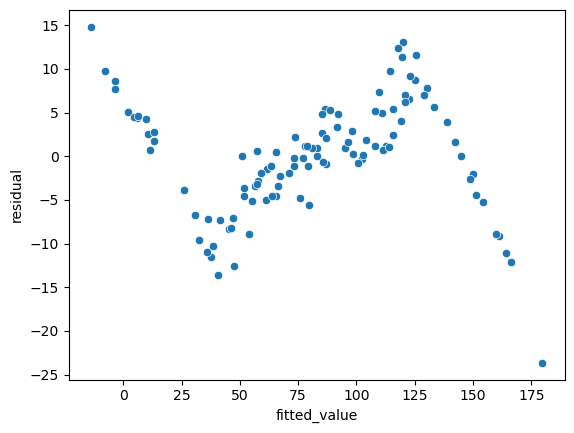

In [81]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

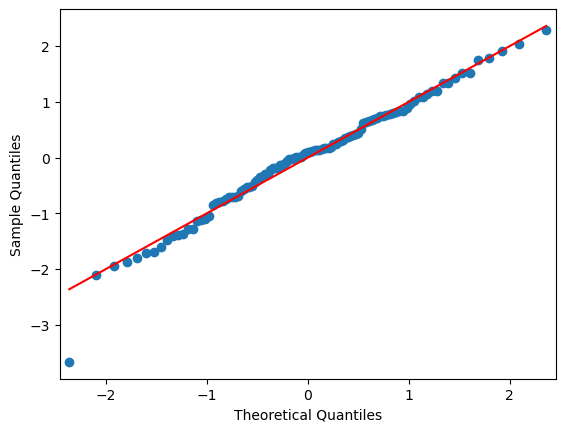

In [82]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

## Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

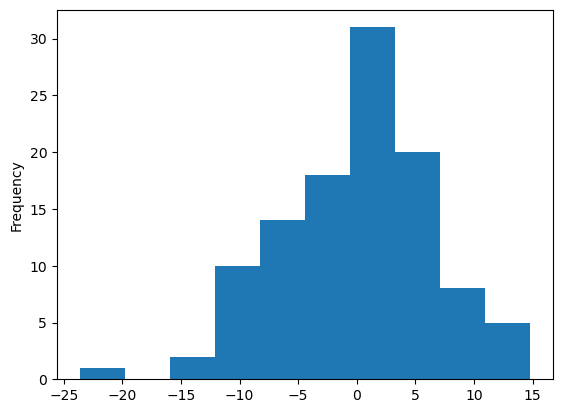

In [83]:
df['residual'].plot.hist()

## Prediction on Test Data (unseen data)

In [84]:
df_test=pd.concat([X_test,y_test],axis=1)
df_test.head()

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Generositys,Perception_of_corruption,Overall_rank
18,6.892,1.433000,1.457000,0.874000,0.454000,0.282625,0.128,0.280,0.282625,19.0
154,3.083,0.282625,0.282625,0.282625,0.282625,0.282625,0.035,0.235,0.282625,155.0
30,6.321,1.149000,1.442000,0.910000,0.516000,0.282625,0.054,0.109,0.282625,31.0
69,5.603,1.004000,1.383000,0.854000,0.282625,0.282625,0.039,0.137,0.282625,70.0
118,4.519,0.886000,0.666000,0.752000,0.346000,0.282625,0.164,0.043,0.282625,119.0


In [85]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Generositys,Perception_of_corruption,Overall_rank,Prediction
18,6.892,1.433000,1.457000,0.874000,0.454000,0.282625,0.128,0.280,0.282625,19.0,18.589355
154,3.083,0.282625,0.282625,0.282625,0.282625,0.282625,0.035,0.235,0.282625,155.0,171.144138
30,6.321,1.149000,1.442000,0.910000,0.516000,0.282625,0.054,0.109,0.282625,31.0,42.306785
69,5.603,1.004000,1.383000,0.854000,0.282625,0.282625,0.039,0.137,0.282625,70.0,70.517174
118,4.519,0.886000,0.666000,0.752000,0.346000,0.282625,0.164,0.043,0.282625,119.0,112.340433


In [86]:
Y = 268.2627 - 37.7546 * 6.892  - 7.6041 * 1.433000 + 75.8177 * 0.128
Y

6.8659870999999555

## Test

In [89]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Overall_rank, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.98


## Train

In [88]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Overall_rank, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.98


### Model is good fit on Train dataset & Performance of model on Test data is also good fit